# TASK-4
**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# twitter_training - dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv.zip to twitter_training.csv.zip


In [8]:
data = pd.read_csv('twitter_training.csv.zip')

In [9]:
 print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


# Preprocessing

In [11]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenization
        tokens = word_tokenize(text)

        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        text = ' '.join(tokens)
        return text
    else:
        return ''

In [12]:
data['clean_text'] = data.iloc[:, 3].apply(preprocess_text)

#Initialize Sentiment Intensity Analyzer

In [14]:
s = SentimentIntensityAnalyzer()

In [15]:
data['sentiment_score'] = data['clean_text'].apply(lambda x: s.polarity_scores(x)['compound'])

In [16]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

<ipython-input-17-5169d9f3c3f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='plasma')


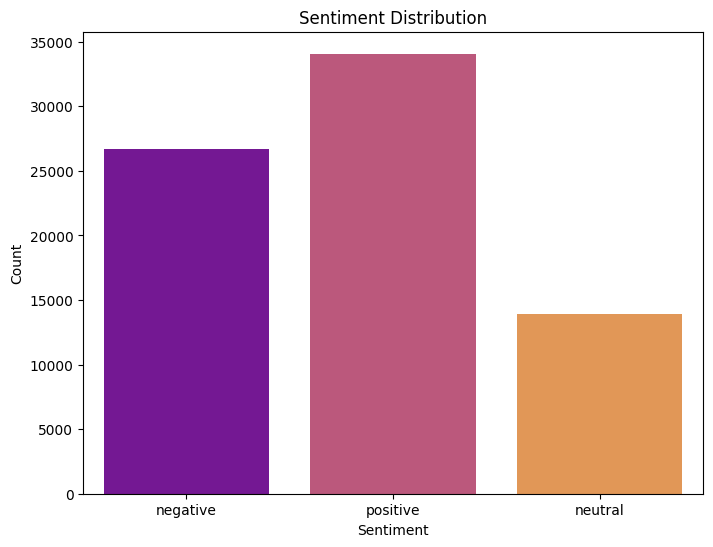

In [17]:
data['sentiment'] = data['sentiment_score'].apply(categorize_sentiment)


plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='plasma')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

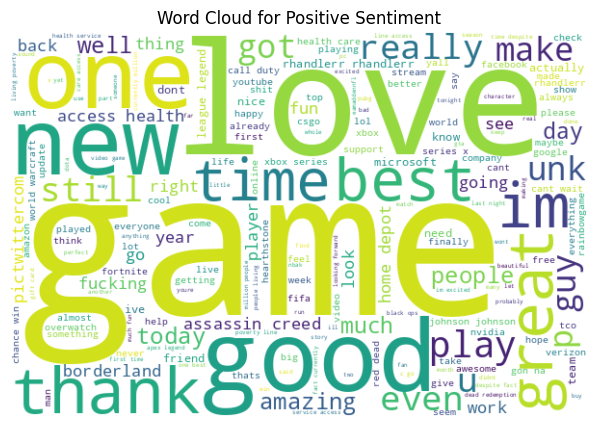

In [18]:
positive_text = ' '.join(data[data['sentiment'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

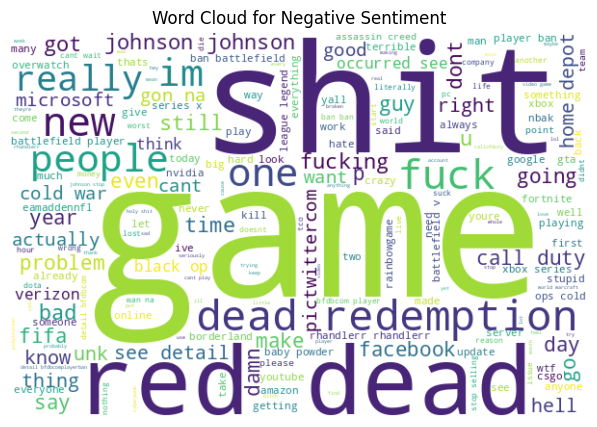

In [19]:
negative_text = ' '.join(data[data['sentiment'] == 'negative']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

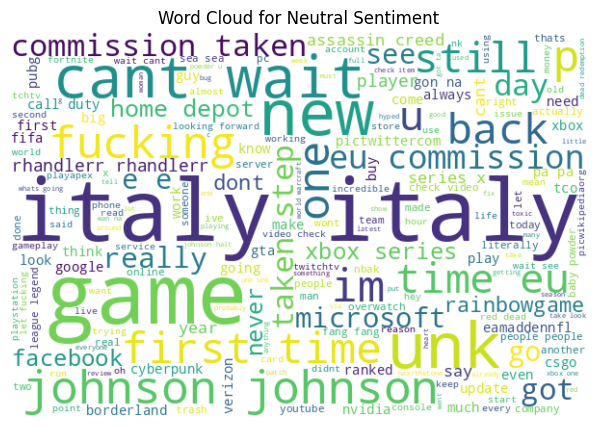

In [20]:
neutral_text = ' '.join(data[data['sentiment'] == 'neutral']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()


# twitter_validation - dataset2

In [22]:
from google.colab import files
uploaded = files.upload()

data2 = pd.read_csv('twitter_validation.csv')

Saving twitter_validation.csv to twitter_validation.csv


In [23]:
print(data2.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [24]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [25]:
def preprocess_text2(text2):
    if isinstance(text2, str):
        text2 = text2.lower()
        text2 = re.sub(r'[^a-zA-Z\s]', '', text2)

        # Tokenization
        tokens = word_tokenize(text2)

        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        text2 = ' '.join(tokens)
        return text2
    else:
        return ''

In [26]:
print(data2.columns)

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


<ipython-input-27-0a1cbe50e5f1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data2, palette='plasma')


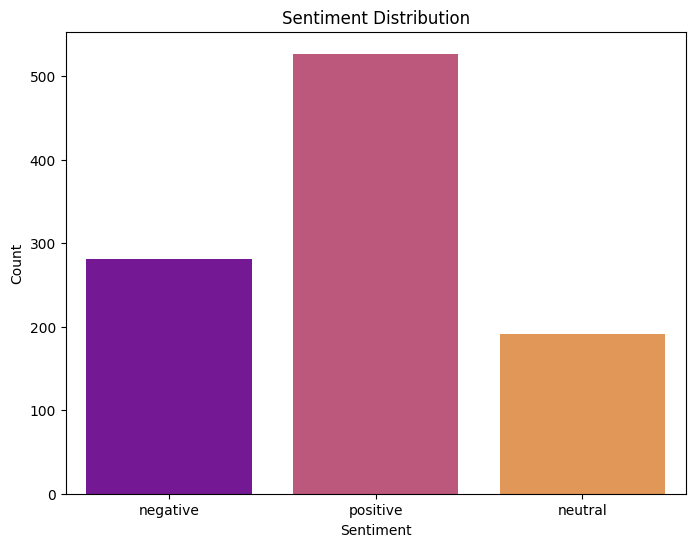

In [27]:
data2['clean_text'] = data.iloc[:, 3].apply(preprocess_text2)


s2 = SentimentIntensityAnalyzer()


data2['sentiment_score'] = data2['clean_text'].apply(lambda x: s.polarity_scores(x)['compound'])


def categorize_sentiment(scores):
    if scores >= 0.05:
        return 'positive'
    elif scores <= -0.05:
        return 'negative'
    else:
        return 'neutral'


data2['sentiment'] = data2['sentiment_score'].apply(categorize_sentiment)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data2, palette='plasma')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

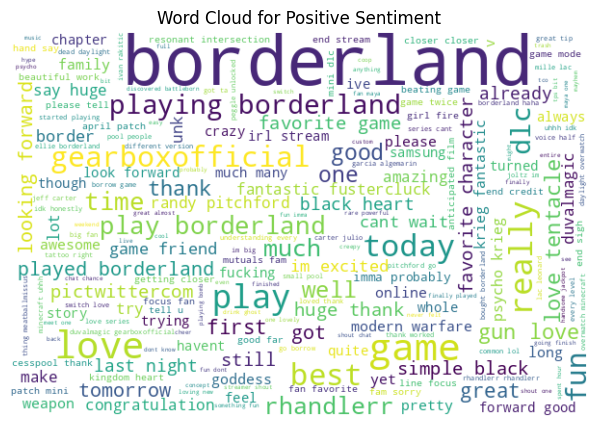

In [28]:
positive_text = ' '.join(data2[data2['sentiment'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

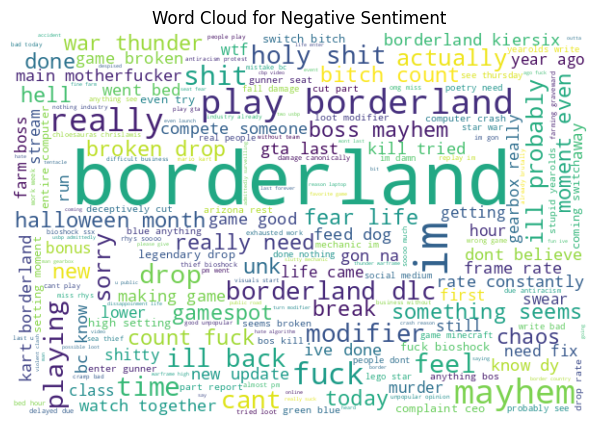

In [29]:
negative_text = ' '.join(data2[data2['sentiment'] == 'negative']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

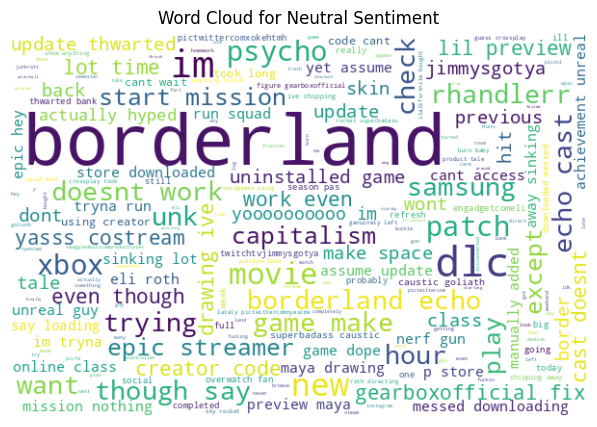

In [30]:
neutral_text = ' '.join(data2[data2['sentiment'] == 'neutral']['clean_text'])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()
